In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 矩陣基本運算

In [2]:
# 矩陣相加
def AddMatrix(a, b):
    tmp = []
    x = len(a)
    y = len(a[0])
    
    for i in range(0, x):
        tmp.append([])
        for j in range(0, y):
            val = a[i][j] + b[i][j]
            tmp[i].append(val)
    return tmp

In [3]:
# 矩陣相減
def SubtractMatrix(a, b):
    tmp = []
    x = len(a)
    y = len(a[0])
    
    for i in range(0, x):
        tmp.append([])
        for j in range(0, y):
            val = a[i][j] - b[i][j]
            tmp[i].append(val)
    return tmp

In [4]:
# 矩陣乘倍數
def MultipleMatrix(input_m, k):
    x = len(input_m)
    y = len(input_m[0])
    tmp = []
    
    for i in range(0, x):
        tmp.append([])
        for j in range(0, y):
            val = k * input_m[i][j]
            tmp[i].append(val)
    return tmp

In [5]:
# 矩陣相乘
def MultifyMatrix(a, b):
    tmp = []
    x = len(a)
    y = len(b[0])
    n = len(b)

    for i in range(0, x):
        tmp.append([])
        for j in range(0, y):
            val = 0
            for k in range(0, n):
                val += a[i][k] * b[k][j]
            tmp[i].append(val)
    
    return tmp

In [6]:
# 矩陣轉置
def Transpose(input_m):
    x = len(input_m)
    y = len(input_m[0])

    tmp = []
    for i in range(0, y):
        tmp.append([])
        for j in range(0, x):
            tmp[i].append(input_m[j][i])

    return tmp

# LU decomposition

In [7]:
# ＬＵ分解，回傳（上三角，下三角）
def LUdecomp(input_m):
    lower_m = []

    length = len(input_m)
    
    # 初始lower_m = 單位矩陣
    for i in range(0, length):
        lower_m.append([])
        for j in range(0, length):
            if i == j:
                lower_m[i].append(1)
            else:
                lower_m[i].append(0)

    # 次數
    for k in range(0, length - 1):
        # 高斯運算
        for i in range(k+1, length):
            # 找倍數
            multiple = input_m[i][k] / input_m[k][k]
            lower_m[i][k] = multiple

            for j in range(k, length):
                input_m[i][j] = input_m[i][j] - input_m[k][j] * multiple
    
    
    return [lower_m, input_m]

In [8]:
# 利用ＬＵ分解求解
def GetSolByLU(regular_m, b):
    A = LUdecomp(regular_m)
    L = A[0]
    U = A[1]

    # Ly = b，先求y，上到下
    y = []
    for i in range(0, len(L)):
        val = b[i][0]
        for j in range(0, i):
            val -= L[i][j] * y[j][0]
        y.append([val])
    
    # Ux = y，在求x，下到上
    x = []
    for i in range(0, len(U)):
        x.append([0])

    for i in range(len(U), 0, -1):
        val = y[i-1][0]
        for j in range(len(U), i, -1):
            val -= U[i-1][j-1] * x[j-1][0]
        x[i-1][0] = val / U[i-1][i-1]
    
    return x

# LSE error
* 最小平方法（跟回歸線比）
* 最小平方法（兩個矩陣比）

In [9]:
# 跟迴歸線比
def LSEerror(data, coef_array):
    error = 0
    for ele in data:
        new_y = 0
        for i in range(0, len(coef_array)):
            # 係數 * x次方（升次）
            new_y += coef_array[i][0] * pow(ele[0], i)
        # x在回歸線上對應y值 - 原y值
        error += pow(new_y - ele[1], 2)
    
    return error

In [10]:
# 兩個矩陣比
def LSEerrorMatrix(a, b):
    error = 0
    x = len(a)
    y = len(a[0])
    
    # 對應項相減取平方
    for i in range(0, x):
        for j in range(0, y):
            error += pow(a[i][j] - b[i][j] ,2)
            
    return error

# Data

In [11]:
# load data from txt and "allData" is string
f = open("testfile.txt")
allData = f.read()
f.close()

In [12]:
# transform data type from string to list
data = []
for ele in allData.split():
    ele = ele.split(",")
    data.append(ele)

for i in range(0, len(data)):
    for j in range(0, len(data[0])):
        data[i][j] = float(data[i][j])

# rLSE
* Design Matrix（A）
* Regular Matrix （A<sup>T</sup>A + λI）

In [13]:
# Design Matrix
def GetDesignMatrix(input_m, n):
    design_m = []
    tmp_m = []

    for ele in input_m:
        for p in range(0, n):
            # 升次
            tmp_m.append(pow(ele[0], p))
        design_m.append(tmp_m)
        tmp_m = []
    
    return design_m

In [14]:
# Regular Matrix
def GetRegularMatrix(input_m, lam):
    input_m_t = Transpose(input_m)
    multify_m = MultifyMatrix(input_m_t, input_m)
    length = len(multify_m)
    for i in range(0, length):
        multify_m[i][i] += lam
    return multify_m

### (A<sup>T</sup>A + λI) x = A<sup>T</sup>b，解x

In [15]:
def rLSE(data, power, lam):
    design_m = GetDesignMatrix(data, power)
    design_m_t = Transpose(design_m)

    b = []
    for ele in data:
        b.append([ele[1]])

    # AtA + λI
    regular_m = GetRegularMatrix(design_m, lam)
    
    #Atb
    design_m_txb = MultifyMatrix(design_m_t, b)
    
    x = GetSolByLU(regular_m, design_m_txb)
    return x

# Newton's Method
* Gradient Matrix
* Hession Matrix

### 2(A<sup>T</sup>Ax - A<sup>T</sup>b)

In [16]:
# Gradient Matrix
def GradientMatrix(data, power, x_bef):
    design_m = GetDesignMatrix(data, power)
    design_m_t = Transpose(design_m)
    
    b = []
    for ele in data:
        b.append([ele[1]])
    
    AtA = MultifyMatrix(design_m_t, design_m)
    AtAx = MultifyMatrix(AtA, x_bef)
    
    Atb = MultifyMatrix(design_m_t, b)
    
    gradient_m = MultipleMatrix(SubtractMatrix(AtAx, Atb) ,2)
    
    return gradient_m

### (2A<sup>T</sup>A)<sup>-1</sup>

In [17]:
# Hession Matrix
def HessionMatrix(data, power):
    design_m = GetDesignMatrix(data, power)
    design_m_t = Transpose(design_m)
    AtA = MultifyMatrix(design_m_t, design_m)
    hession_m = np.linalg.inv(MultipleMatrix(AtA, 2)).tolist()
    
    return hession_m

### X<sub>n+1</sub> = X<sub>n</sub> - (2A<sup>T</sup>A)<sup>-1</sup> * 2(A<sup>T</sup>Ax - A<sup>T</sup>b)

In [18]:
def NewtonMethod(data, power):
    x_bef = np.random.uniform(low=min(data)[0], high=max(data)[1], size=(power,1)).tolist()
    
    error = 99.9
    
    while(error > 0.01):
        gradient_m = GradientMatrix(data, power, x_bef)
        hession_m = HessionMatrix(data, power)

        x_aft = SubtractMatrix(x_bef, MultifyMatrix(hession_m, gradient_m))

        error = LSEerrorMatrix(x_aft, x_bef)
        
        x_bef = x_aft
    
    return x_aft

# 畫圖

In [23]:
def PlotLSE(data, coef_array):
    X_data = []
    Y_data = []
    for ele in data:
        X_data.append(ele[0])
        Y_data.append(ele[1])

    x = np.linspace(min(X_data)-1, max(X_data)+1, 100)
    y = []
    for num in x:
        val = 0
        for i in range(0, len(coef_array)):
            val += pow(num, i) * coef_array[i][0]
        y.append(val)

    plt.figure(figsize=(10, 8))
    plt.plot(X_data, Y_data, 'ro')
    plt.plot(x, y)
    plt.show()

# Example 1

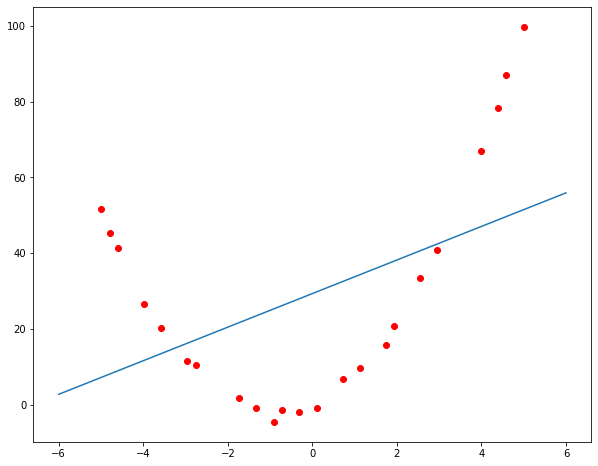

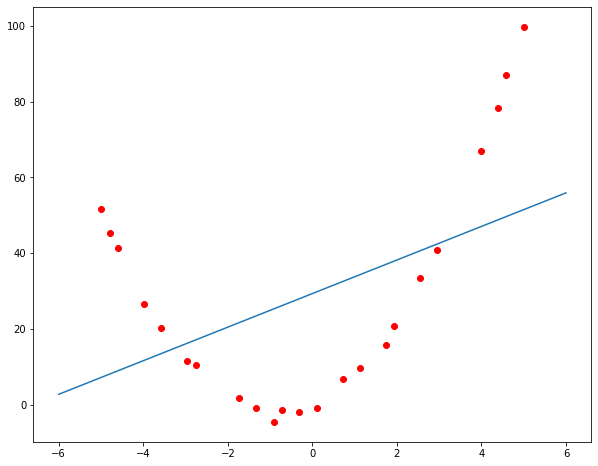

In [24]:
x1 = rLSE(data, 2, 0)
PlotLSE(data, x1)

x2 = NewtonMethod(data, 2)
PlotLSE(data, x2)

# Example 2

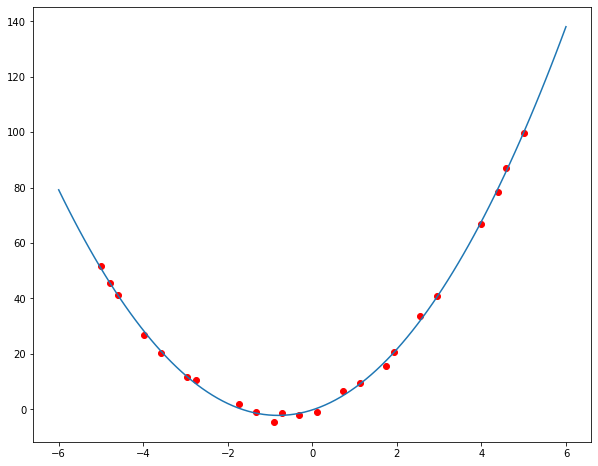

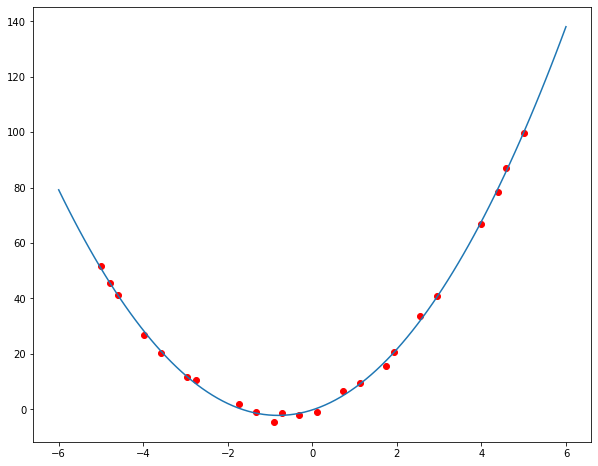

In [25]:
x1 = rLSE(data, 3, 0)
PlotLSE(data, x1)

x2 = NewtonMethod(data, 3)
PlotLSE(data, x2)

# Example 3

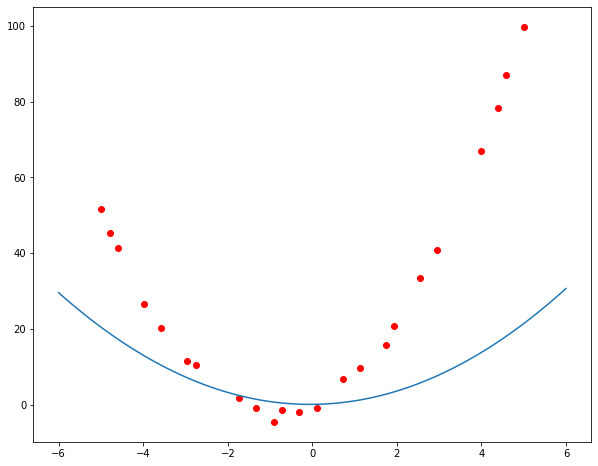

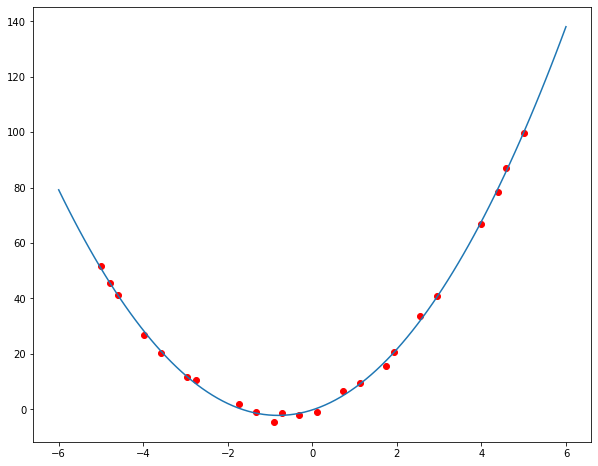

In [26]:
x1 = rLSE(data, 3, 10000)
PlotLSE(data, x1)

x2 = NewtonMethod(data, 3)
PlotLSE(data, x2)